In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
%matplotlib inline

In [3]:
import librosa
import librosa.display
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
metadata = pd.read_csv('/content/drive/My Drive/Major/Dataset/celeb.csv')

In [6]:
metadata.head(10)

,slice_file_name,fsID,start,end,salience,folder,classID,class
0,co1.wav,co1,0,5,1,1,1,Chiranjeevi_original
1,co2.wav,co2,0,5,1,1,1,Chiranjeevi_original
2,co3.wav,co3,0,5,1,1,1,Chiranjeevi_original
3,co4.wav,co4,0,5,1,1,1,Chiranjeevi_original
4,co5.wav,co5,0,5,1,1,1,Chiranjeevi_original
5,co6.wav,co6,0,5,1,1,1,Chiranjeevi_original
6,co7.wav,co7,0,5,1,1,1,Chiranjeevi_original
7,co8.wav,co8,0,5,1,1,1,Chiranjeevi_original
8,co9.wav,co9,0,5,1,1,1,Chiranjeevi_original
9,co10.wav,c10,0,5,1,1,1,Chiranjeevi_original


In [7]:
metadata['class'].value_counts()

ntr_original            40
Chiranjeevi_original    40
ntr_spoof               30
Chiranjeevi_spoof       30
Name: class, dtype: int64

In [8]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [9]:
import numpy as np
#def manipulate(data, noise_factor):
    #noise = np.random.randn(len(data))
    #augmented_data = data + noise_factor * noise
    # Cast back to same data type
    #augmented_data = augmented_data.astype(type(data[0]))
    #return augmented_data

def manipulate(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)    

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
from tqdm import tqdm
import math 
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = "/content/drive/My Drive/Major/Dataset/" + str(row["folder"])+"/"+str(row["slice_file_name"])
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    
    ###Data Augmentation

    librosa_audio_data,librosa_sample_rate=librosa.load(file_name)
    aug_data = manipulate(librosa_audio_data, 1.5)
    data1=features_extractor(aug_data)
    extracted_features.append([data1,final_class_labels])

140it [03:18,  1.42s/it]


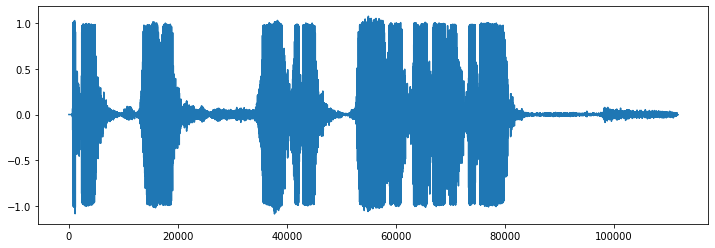

In [12]:
librosa_audio_data,librosa_sample_rate=librosa.load(file_name)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

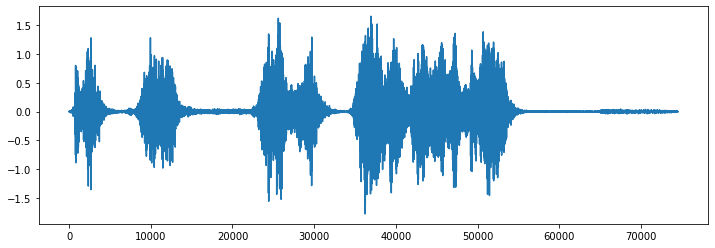

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(aug_data)

In [14]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-268.76205, 118.80415, 8.75868, -0.39495918, ...",Chiranjeevi_original
1,"[-268.76205, 118.80415, 8.75868, -0.39495918, ...",Chiranjeevi_original
2,"[-276.53424, 122.71467, 3.430855, -5.6095133, ...",Chiranjeevi_original
3,"[-276.53424, 122.71467, 3.430855, -5.6095133, ...",Chiranjeevi_original
4,"[-278.35916, 133.54228, 11.764387, -0.03837954...",Chiranjeevi_original


In [15]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [16]:

X.shape

(280, 40)

In [17]:
y.shape

(280,)

In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train

array([[-2.92194092e+02,  1.39620590e+02,  8.98423195e+00, ...,
        -1.80145037e+00, -3.21983814e+00, -1.65373003e+00],
       [-1.71313751e+02,  1.17186630e+02, -8.60258484e+00, ...,
         5.13881326e-01, -2.17698860e+00,  3.63800824e-01],
       [-2.35318420e+02,  1.33329742e+02,  5.09823942e+00, ...,
         7.61898398e-01,  1.40185738e+00,  3.92657161e+00],
       ...,
       [-1.54950134e+02,  1.47640762e+02, -1.68065701e+01, ...,
         2.07886696e+00, -2.72283018e-01,  2.09411398e-01],
       [-2.67158478e+02,  1.44629333e+02, -1.93607025e+01, ...,
         1.89210308e+00,  2.81170201e+00,  1.91747558e+00],
       [-1.85125137e+02,  1.20984695e+02,  3.22187591e+00, ...,
        -3.30099493e-01, -5.08584082e-01, -6.88392878e-01]], dtype=float32)

In [21]:
X_train.shape

(224, 40)

In [22]:
X_test.shape

(56, 40)

In [23]:

y_train.shape

(224, 4)

In [24]:
y_test.shape

(56, 4)

In [25]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
num_labels=y.shape[1]

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
7/7 [==============================] - 1s 94ms/step - loss: 39.1650 - accuracy: 0.2183 - val_loss: 9.5795 - val_accuracy: 0.2679

Epoch 00001: val_loss improved from inf to 9.57947, saving model to saved_models/audio_classification.hdf5
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 31.9274 - accuracy: 0.2494 - val_loss: 9.6365 - val_accuracy: 0.2143

Epoch 00002: val_loss did not improve from 9.57947
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 22.9662 - accuracy: 0.3000 - val_loss: 4.8469 - val_accuracy: 0.2143

Epoch 00003: val_loss improved from 9.57947 to 4.84693, saving model to saved_models/audio_classification.hdf5
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 20.8590 - accuracy: 0.2648 - val_loss: 1.6117 - val_accuracy: 0.3036

Epoch 00004: val_loss improved from 4.84693 to 1.61166, saving model to saved_models/audio_classification.hdf5
Epoch 5/100
7/7 [==============================] - 0

In [32]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7678571343421936


In [33]:
y_predict = model.predict_classes(X_test)

In [34]:
filename="/content/drive/My Drive/Major/Dataset/test1.mp3"
audio, sample_rate = librosa.load(filename, res_type='kaiser_best') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

[1]
['Chiranjeevi_spoof']


In [35]:
print(y_predict)

[3 0 3 2 3 0 2 2 1 0 2 1 0 2 0 3 3 0 0 0 1 1 2 2 1 2 0 0 3 0 0 0 2 3 0 0 0
 2 3 1 3 3 1 0 1 0 3 2 0 1 0 1 0 0 0 2]
